## Selection of Methods


 ##### Libraries 
 - spaCy
 
 spaCy outperforms NLTK in **word tokenization** & **Part-of-speech tagging**, and though NLTK performs faster for **Sentence tokenization** through simple attempts at splitting text into sentences, spaCy constructs a syntactic tree for each sentence which is a more robust method that yields more information about the text.

 Here we assume that the Out of bag samples are all in English, and as such spaCy can be used


 ![https://www.thedataincubator.com/wp-content/uploads/timing.png](https://www.thedataincubator.com/wp-content/uploads/timing.png)

## Methods to explore (from proposal)
- TF-IDF
- N-gram
- Word Embedding
- Bag-of-Words
- Skip-Gram


In [202]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Project/labeled_data.csv"
twitter_hate = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
twitter_hate.head(20)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [152]:
twitter_hate['pre_clean_len'] = [len(t) for t in twitter_hate.tweet]

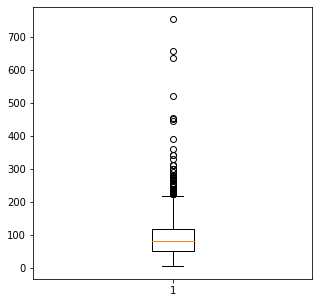

In [153]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(twitter_hate.pre_clean_len)
plt.show()

### Cleaning Tweets V1

https://www.kaggle.com/code/thebrownviking20/topic-modelling-with-spacy-and-scikit-learn/notebook

In [154]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
#!python -m spacy download en_core_web_lg

In [173]:
import string
from tqdm import tqdm
import re 

stopwords = list(STOP_WORDS) +['rt']
punctuations = list(string.punctuation)
punctuations.remove('#')
parser = English()
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [203]:
tqdm.pandas()
twitter_hate["tweets_cleaned_v1"] = twitter_hate["tweet"].progress_apply(spacy_tokenizer)

100%|██████████| 24783/24783 [00:06<00:00, 3674.68it/s]


1. removing @ mentions
2. URL Links
3. Numbers
4. Underscores

In [204]:
tqdm.pandas()
twitter_hate["tweets_cleaned"] = twitter_hate["tweets_cleaned_v1"].progress_apply(lambda x: re.sub(r"(_[A-Za-z0-9-_]+)|(@[A-Za-z0-9]+)|[^\w\s]|http\S+|[0-9]", "",x))



100%|██████████| 24783/24783 [00:00<00:00, 174395.57it/s]


In [205]:
twitter_hate.head(1000)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweets_cleaned_v1,tweets_cleaned
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,@mayasolovely woman complain cleaning house am...,woman complain cleaning house amp man trash
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,@mleew17 boy dats cold ... tyga dwn bad cuffin...,boy dats cold tyga dwn bad cuffin dat hoe st...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,@urkindofbrand dawg @80sbaby4life fuck bitch s...,dawg fuck bitch start cry confused shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,@c_g_anderson @viva_based look like tranny,look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,@shenikaroberts shit hear true faker bitch tol...,shit hear true faker bitch told ya
...,...,...,...,...,...,...,...,...,...
995,1017,3,0,3,0,1,&#128514;&#128514;&#128514;&#128514; RT @SMASH...,# 128514;&#128514;&#128514;&#128514 @smashavel...,murda sucking bitches howdhow
996,1018,3,0,3,0,1,&#128514;&#128514;&#128514;&#128514; bitch if ...,# 128514;&#128514;&#128514;&#128514 bitch hobb...,bitch hobbit need let know right
997,1019,3,0,2,1,1,&#128514;&#128514;&#128514;&#128514; these fol...,# 128514;&#128514;&#128514;&#128514 folks bad ...,folks bad talk trash
998,1020,6,0,6,0,1,&#128514;&#128514;&#128514;&#128514;&#128514; ...,# 128514;&#128514;&#128514;&#128514;&#128514 b...,brittany bitch u dog man


In [207]:
def bucket (x):
  if x == 2:
    return 0
  else:
    return 1

In [206]:

twitter_hate["class"] = twitter_hate['class'].progress_apply(bucket)

100%|██████████| 24783/24783 [00:00<00:00, 726234.78it/s]


In [208]:
twitter_cleaned = twitter_hate[["tweets_cleaned","class"]]

In [210]:
twitter_cleaned.head(100)

,tweets_cleaned,class
0,woman complain cleaning house amp man trash,0
1,boy dats cold tyga dwn bad cuffin dat hoe st...,1
2,dawg fuck bitch start cry confused shit,1
3,look like tranny,1
4,shit hear true faker bitch told ya,1
...,...,...
95,going school sucks dick hoes attend,1
96,way fuck yo bitch year old,1
97,come bring food car retard,1
98,richnow hella tinder hoes friend anymore chil...,1


### Cleaning Tweets V2

https://aronakhmad.medium.com/twitter-data-cleaning-using-python-db1ec2f28f08


In [65]:
import html
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [66]:
twitter_hate.shape

(24783, 9)

In [ ]:
twitter_hate.tweet[100]

### Removes any possible HTML entities that need to be decoded into characters. Cleaning up newlines that make data messy

In [64]:

for i in range(len(twitter_hate.tweet)):
    x = twitter_hate.tweet[i].replace("\n", " ")
    twitter_hate.tweet[i] = html.unescape(x)


NameError: ignored

### Removing media links in tweets and cleaning up hash characters and usernames

In [ ]:
for i in range (len(twitter_hate.tweet)):
    twitter_hate.tweet[i] = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", twitter_hate.tweet[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import nltk
nltk.download('stopwords')
tweets_cleaned = twitter_hate.tweet.copy()
sw = stopwords.words('english')
sw.remove("not")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Tokenizing each row of Tweet

In [ ]:
nltk.download('punkt')
for i in range(len(tweets_cleaned)):
    tweets_cleaned[i] = word_tokenize(tweets_cleaned[i])




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Removing Stopwords based on business logic

In [ ]:
additional_sw = ["RT","spa","massage","slope","park","rt"]
for i in range(len(tweets_cleaned)):
    tweets_cleaned[i] = [word for word in tweets_cleaned[i] if not word in sw +additional_sw]

### To make the lemmatization better and context dependent, we would need to find out the POS tag and pass it on to the lemmatizer. We would first find out the POS tag for each token using NLTK, use that to find the corresponding tag in WordNet and then use the lemmatizer to lemmatize the token based on the tag

### Here is a function that Incorporates POS tagging and lemmatization for given sentence

https://www.holisticseo.digital/python-seo/nltk/lemmatize

https://gaurav5430.medium.com/using-nltk-for-lemmatizing-sentences-c1bfff963258

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
tweets_cleaned[4]

['The',
 'shit',
 'hear',
 'might',
 'true',
 'might',
 'faker',
 'bitch',
 'told',
 'ya']

Joining tokenized values to form a fully cleaned tweet

In [ ]:
for i in range( len(tweets_cleaned)):
  tweets_cleaned[i] = ' '.join(tweets_cleaned[i])

Told is lemmatized to tell

In [ ]:
lemmatize_sentence(tweets_cleaned[4])

'The shit hear might true might faker bitch tell ya 57361'

In [ ]:

twitter_hate['tweets_cleaned_v2'] = tweets_cleaned

In [63]:
twitter_hate.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,pre_clean_len,tweets_cleaned_v1
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,@mayasolovely woman complain cleaning house am...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,@mleew17 boy dats cold ... tyga dwn bad cuffin...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,@urkindofbrand dawg @80sbaby4life fuck bitch s...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,@c_g_anderson @viva_based look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,@shenikaroberts shit hear true faker bitch tol...


### Version two of cleaned tweets is much better

### Unsupervised Learning for Topic Modelling 

#### Using Topic Modelling to conduct a rough EDA on the frequent words under different topics

https://www.kaggle.com/code/thebrownviking20/topic-modelling-with-spacy-and-scikit-learn/notebook

In [ ]:
!pip install pyldavis
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence


     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=ef54726cd41abc90b4d57e2d4d66a44ed93754e7da7cb8bc94312421107dcfaf
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(twitter_hate.tweets_cleaned_v2)

In [ ]:
NUM_TOPICS = 20

In [ ]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized) 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=NUM_TOPICS)
data_lsi = lsi.fit_transform(data_vectorized)

In [ ]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [ ]:
# Keywords for topics clustered by Latent Dirichlet Allocation
print("LDA Model:")
selected_topics(lda, vectorizer)

LDA Model:
Topic 0:
[('say', 483.41744443821324), ('bitch', 327.8336222157887), ('old', 206.93965767487205), ('ima', 146.81526376472016), ('jus', 98.42449249253552), ('basic', 94.01220515969914), ('son', 88.4317305930408), ('redneck', 85.77351589399659), ('class', 73.70174102827264), ('date', 59.169541869922135)]
Topic 1:
[('lol', 1012.1508142900158), ('bitch', 448.84678056519743), ('really', 441.1031464738275), ('eat', 262.98282275953585), ('today', 213.6732663646936), ('guys', 135.58050501441275), ('haha', 129.01546583027675), ('funny', 116.85878101533424), ('straight', 113.308362576562), ('years', 90.93598266637147)]
Topic 2:
[('pussy', 2086.0204304495064), ('think', 467.99871591839866), ('right', 377.7812807524508), ('let', 347.3810845705688), ('day', 343.9086704603811), ('new', 300.3677912598058), ('like', 287.35751448638064), ('fat', 224.81789063967298), ('birds', 223.65269723614557), ('fag', 181.88588567966138)]
Topic 3:
[('hoe', 1671.5055131873387), ('make', 485.17718539788166)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('dont', 1269.0940018894596), ('bitch', 822.2152760364546), ('dick', 348.4363953064748), ('little', 316.5058411139003), ('stupid', 262.30763380454187), ('hit', 224.36914625107656), ('hell', 147.48820608420883), ('tweet', 131.85962745144286), ('hot', 120.06835027411609), ('live', 111.90788156626179)]
Topic 10:
[('trash', 1153.4644614322224), ('real', 426.39002125175165), ('charlie', 288.53864297920535), ('mad', 206.79977575652822), ('wont', 155.83568936021223), ('long', 111.47133463413539), ('hope', 110.19493998513717), ('text', 107.96500679821844), ('playing', 99.54954113055395), ('job', 91.00345470413724)]
Topic 11:
[('people', 427.28760182906944), ('white', 366.0399960326703), ('tell', 332.0610687292075), ('yankees', 227.52010896527824), ('black', 217.2105134091629), ('bitch', 156.4662208350849), ('year', 134.1806995699872), ('gets', 104.8024654072913), ('leave', 89.80991622985836), ('niggers', 82.95042943154795)]
Topic 12:
[('fucking', 635.9706291868957), ('yellow', 254.59322325738

In [ ]:
# Keywords for topics clustered by Latent Semantic Indexing
print("NMF Model:")
selected_topics(nmf, vectorizer)

NMF Model:
Topic 0:
[('bitch', 11.081030628627003), ('bad', 0.30440468516074043), ('lil', 0.18731421113305444), ('little', 0.16402926883865473), ('say', 0.16048650787238056), ('said', 0.1492505783934333), ('need', 0.14882423711598594), ('gon', 0.14120496057239154), ('tell', 0.13556758992688706), ('make', 0.13382960319225767)]
Topic 1:
[('like', 11.158825374234274), ('look', 1.0540777496294742), ('act', 0.33176214803932585), ('feel', 0.3098691146355782), ('looks', 0.270624967550783), ('hate', 0.22117148658358518), ('acting', 0.18446524888069962), ('really', 0.17837265476846062), ('bad', 0.1503939364292053), ('make', 0.14635823630020692)]
Topic 2:
[('bitches', 6.2545561403194565), ('bad', 0.36826501950010715), ('hate', 0.1590980649288498), ('want', 0.13936568925009943), ('dick', 0.12085700841456891), ('money', 0.11929040351452073), ('think', 0.11853342950985998), ('good', 0.11029826700835403), ('fat', 0.10186000963749496), ('wit', 0.09126563373700976)]
Topic 3:
[('hoes', 6.13293323908671

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('shit', 6.964509727073315), ('talk', 0.4297047731216925), ('wit', 0.1808173733957677), ('hate', 0.17641447042348268), ('going', 0.1751838036502271), ('talking', 0.17218027381932619), ('dat', 0.148880767479898), ('real', 0.13720338780271993), ('bout', 0.13454444909412833), ('damn', 0.1311105051790396)]
Topic 11:
[('nigga', 6.2598396956867), ('real', 0.32616767732962776), ('want', 0.2418301573485798), ('gon', 0.15285479247539072), ('spic', 0.14222637527225754), ('lame', 0.0896569755094116), ('broke', 0.0693497934451127), ('said', 0.06509269438788202), ('talking', 0.05890462147423633), ('lmao', 0.05676805562188763)]
Topic 12:
[('lol', 6.9599050944857455), ('niggah', 0.16699897201660058), ('damn', 0.14622770677936797), ('said', 0.13771792716230394), ('lmao', 0.13682996193627506), ('want', 0.13324898012159017), ('time', 0.12443729178719894), ('funny', 0.11970901093025031), ('nicca', 0.11956840850118516), ('big', 0.10716774545473298)]
Topic 13:
[('trash', 5.3073217212154535), ('white', 0.8

In [ ]:
# Keywords for topics clustered by Non-Negative Matrix Factorization
print("LSI Model:")
selected_topics(lsi, vectorizer)

LSI Model:
Topic 0:
[('bitch', 0.9242762445230983), ('like', 0.19140626865704694), ('ass', 0.1183720670677853), ('dont', 0.11067579822354887), ('fuck', 0.09672259303121888), ('nigga', 0.09059550337581292), ('got', 0.0867908666541206), ('shit', 0.07438791280254062), ('bitches', 0.07235618463378174), ('aint', 0.06826028054182376)]
Topic 1:
[('bitches', 0.6142586078282678), ('like', 0.46073102304692143), ('hoes', 0.28967548791623393), ('dont', 0.20255678870159513), ('pussy', 0.1701650835744926), ('got', 0.1674517553137143), ('hoe', 0.13669618432423128), ('shit', 0.10664495639503851), ('niggas', 0.10327275123097832), ('fuck', 0.1026300866933195)]
Topic 2:
[('hoes', 0.5107065597033827), ('like', 0.29456381539140103), ('pussy', 0.2176335338396028), ('hoe', 0.18365033862342525), ('dont', 0.12088645299601229), ('got', 0.07366818512140451), ('aint', 0.07026523922407236), ('nigga', 0.04568732903255342), ('ass', 0.039590914277576286), ('trash', 0.03337442109116818)]
Topic 3:
[('hoes', 0.612791129

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('shit', 0.7713342218750351), ('aint', 0.4042383165499546), ('trash', 0.25030659274514105), ('nigga', 0.21461569202613925), ('lol', 0.08327700479191955), ('talk', 0.04867351212430732), ('white', 0.039525462035676875), ('real', 0.03198445670469683), ('wit', 0.02769735358286338), ('bout', 0.026948131629245756)]
Topic 11:
[('nigga', 0.8635322219779216), ('real', 0.03510858918698417), ('want', 0.03476444369743416), ('dont', 0.03418174196215218), ('like', 0.02785631441362324), ('spic', 0.02108333663485578), ('got', 0.01579090637925804), ('gon', 0.013953578814632585), ('bitches', 0.013210606407068894), ('lame', 0.011219934550767892)]
Topic 12:
[('lol', 0.6823168246208117), ('trash', 0.5064538995899558), ('nigga', 0.28303919453110704), ('white', 0.08012837961031223), ('youre', 0.04994335375393251), ('love', 0.03830482337929574), ('good', 0.035790325658229385), ('know', 0.03520720138714779), ('thats', 0.032037919194011596), ('want', 0.031367777338289236)]
Topic 13:
[('lol', 0.6013919305741117


#### 1. Topics on the left while their respective keywords are on the right.
#### 2. Larger topics are more frequent and closer the topics, mor the similarity
#### 3. Selection of keywords is based on their frequency and discriminancy.

In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/p

PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
8      -10.878068   10.538728       1        1  7.061586
15     -60.884026  -75.591820       2        1  6.940074
16      -2.336119  -53.289074       3        1  6.834694
5      -61.385319  -12.914634       4        1  6.201390
2      -28.737743  126.296997       5        1  6.180799
3        1.066606 -123.552811       6        1  6.028217
7       45.140720   -7.947869       7        1  5.340570
6     -140.795975  -98.530548       8        1  5.244453
17      61.531681  -83.240562       9        1  5.091869
18     -72.563057 -140.396881      10        1  4.892889
9       15.984491   63.578186      11        1  4.723856
14    -160.851624   68.945145      12        1  4.628934
10      85.961830   51.922935      13        1  4.299960
1      -99.020836  109.936348      14        1  4.183798
13    -176.764130   -8.681684      15        1  4.183592
11    -117.189880  -37.420200      16        1  3.929755
12     108.829918  -22.946203      17        1  3.658309
19      47.588097  121.934814      18        1  3.647980
0     -106.467834   30.176889      19        1  3.567784
4      -50.613804   59.328842      20        1  3.359491, topic_info=         Term         Freq        Total Category  logprob  loglift
1580     hoes  2335.000000  2335.000000  Default  30.0000  30.0000
308   bitches  2962.000000  2962.000000  Default  29.0000  29.0000
2641    pussy  1969.000000  1969.000000  Default  28.0000  28.0000
1417      got  1552.000000  1552.000000  Default  27.0000  27.0000
307     bitch  7876.000000  7876.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
189      babe    29.307189    30.231564  Topic20  -5.0736   3.3623
3339      tbh    25.986939    26.911315  Topic20  -5.1939   3.3584
3263    sucks    25.349010    26.273385  Topic20  -5.2187   3.3576
367      born    24.326112    25.250488  Topic20  -5.2599   3.3561
2229   movies    23.885749    24.810124  Topic20  -5.2782   3.3554

[670 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
15        1  0.988176       act
17       10  0.991614    acting
24        5  0.982176  actually
39       20  0.977302       ago
50        1  0.998820      aint
...     ...       ...       ...
3847      2  0.988567       yes
3854      2  0.978997     youll
3855      8  0.994503     young
3857      2  0.998288     youre
3860     17  0.970878     youve

[642 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 16, 17, 6, 3, 4, 8, 7, 18, 19, 10, 15, 11, 2, 14, 12, 13, 20, 1, 5])

### Splitting to test and train data, ensuring balance of classes

Here the class labels are as such and are imbalanced:

<br/> 0 = Hate Speech (5.77%)<br>
<br/> 1 = Offensive Speech (77.43%)<br>
<br/> 2 = Neither (Neutral) (16.8%) <br>


In [ ]:
for i,j in enumerate(twitter_hate['class'].value_counts().sort_index()):
    print(i,j,j/twitter_hate.shape[0]*100)

0 1430 5.770084332001776
1 19190 77.43211072105879
2 4163 16.797804946939436


In [ ]:
X = twitter_hate.tweets_cleaned_v2
y = twitter_hate['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19826,)
(19826,)
(4957,)
(4957,)


Ensuring balance in class for both the training and test sets

In [ ]:
for i,j in enumerate(y_train.value_counts().sort_index()):
    print(i,j,j/y_train.shape[0]*100)

for i,j in enumerate(y_test.value_counts().sort_index()):
    print(i,j,j/y_test.shape[0]*100)

0 1144 5.770200746494502
1 15352 77.43367295470594
2 3330 16.796126298799557
0 286 5.769618721000605
1 3838 77.42586241678434
2 833 16.804518862215048


### Predicting class labels using NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test_nb(vect, X_train, y_train, X_test, y_test):
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the class labels of tweets
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # print the accuracy of its predictions
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
tokenize_test_nb(vect, X_train, y_train, X_test, y_test)

NameError: ignored

In [ ]:
vect = TfidfVectorizer()
tokenize_test_nb(vect, X_train, y_train, X_test, y_test)

In [ ]:
vect = TfidfVectorizer(norm=None)
tokenize_test_nb(vect, X_train, y_train, X_test, y_test)

In [ ]:
vect = TfidfVectorizer(norm=None,stop_words='english')
tokenize_test_nb(vect, X_train, y_train, X_test, y_test)

In [ ]:
vect = TfidfVectorizer(norm=None,stop_words='english',ngram_range=(1, 2))
tokenize_test_nb(vect, X_train, y_train, X_test, y_test)

### Predicting using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

def tokenize_test_lr(vect, X_train, y_train, X_test, y_test):
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use logistic regression to predict the class labels of tweets
    # Regularization at 0.01, solver stochastic gradient , iterate for 500 epochs
    lr = LogisticRegression(C=100,solver='sag',max_iter=500)
    lr.fit(X_train_dtm, y_train)
    y_pred_class = lr.predict(X_test_dtm)
    
    # print the accuracy of its predictions
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
vect = CountVectorizer()
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

Features:  20213
Accuracy:  0.8771434335283438


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
vect = TfidfVectorizer()
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

Features:  20213
Accuracy:  0.8769416986080291


In [ ]:
vect = TfidfVectorizer(norm=None)
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

Features:  20213
Accuracy:  0.864635868468832


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
vect = TfidfVectorizer(norm=None,stop_words='english')
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

Features:  19949
Accuracy:  0.864635868468832


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
vect = TfidfVectorizer(norm=None,stop_words='english',ngram_range=(1, 2))
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

Features:  110022
Accuracy:  0.892071817631632


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
#  max_features= 50000, max_df = 0.5
vect = TfidfVectorizer(norm=None,stop_words='english',ngram_range=(1, 2), max_df= 0.7)
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

Features:  110022
Accuracy:  0.8924752874722615


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


### Text Generation Using LSTM

https://www.kaggle.com/code/shivamb/beginners-guide-to-text-generation-using-lstms/notebook

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [ ]:
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
# import keras.utils as ku 

In [ ]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

In [ ]:
twitter_hate.tweets_cleaned_v2[0]

'As woman shouldnt complain cleaning house man always take trash'

In [ ]:
inp_sequences, total_words = get_sequence_of_tokens(twitter_hate.tweets_cleaned_v2)
inp_sequences[:10]

[[582, 319],
 [582, 319, 940],
 [582, 319, 940, 1020],
 [582, 319, 940, 1020, 3420],
 [582, 319, 940, 1020, 3420, 235],
 [582, 319, 940, 1020, 3420, 235, 23],
 [582, 319, 940, 1020, 3420, 235, 23, 41],
 [582, 319, 940, 1020, 3420, 235, 23, 41, 100],
 [582, 319, 940, 1020, 3420, 235, 23, 41, 100, 94],
 [582, 319, 940, 1020, 3420, 235, 23, 41, 100, 94, 20]]

In [ ]:
import numpy as np
# !pip install --upgrade tensorflow
import keras.utils.np_utils as ku
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

In [ ]:
predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [ ]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 10)            262980    
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 26298)             2656098   
                                                                 
Total params: 2,963,478
Trainable params: 2,963,478
Non-trainable params: 0
_________________________________________________________________


Can try to test with larger variety of data? 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
model.fit(predictors, label, epochs=20, verbose=5)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [ ]:
model.save("/content/drive/My Drive/Project/model_1")

INFO:tensorflow:Assets written to: /content/drive/My Drive/Project/model_1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Project/model_1/assets


In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted,axis=1)       

        # predict_x=model.predict(X_test) 
        # classes_x=np.argmax(predict_x,axis=1)

        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [ ]:
print(generate_text("Yo", 5, model, max_sequence_len))

Yo Bitch Ass Nigga Aint Shit


In [ ]:
print(generate_text("You are", 5, model, max_sequence_len))

You Are Trash I Got Ta Start


In [ ]:
print(generate_text("You are not", 5, model, max_sequence_len))

You Are Not Not Bitch Ass Nigga Dont


In [ ]:
print(generate_text("How are you so", 5, model, max_sequence_len))

How Are You So Bitches Love Problem I Got


In [ ]:
print(generate_text("You are so", 5, model, max_sequence_len))

You Are So Many Bitches Like I Dont


In [ ]:
print(generate_text("I am not a", 5, model, max_sequence_len))

I Am Not A Bitch I Dont Know I


In [ ]:
print(generate_text("Hi how are you, why are you", 5, model, max_sequence_len))

Hi How Are You, Why Are You Got Ta Shape Pussy Lips


In [ ]:
print(generate_text("what do you mean, I don't want", 5, model, max_sequence_len))

What Do You Mean, I Don'T Want Bitch I Dont Know I


In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/drive/My Drive/Project/model_1')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 10)            262980    
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 26298)             2656098   
                                                                 
Total params: 2,963,478
Trainable params: 2,963,478
Non-trainable params: 0
_________________________________________________________________


After user types in a message, model automatically detects the next defined (K = number of relevant continuous words). Based on TF-IDF , we can set a threshold limit using n-grams or word frequency.

For example, if the top 10 words for the classified hate speech appears in the predicted phrase based on the sentence that the user has generated so far, a warning message will appear to the user - " If you post this message, and the message is tagged as a hate speech, you will be severely penalized" 